# Adversarial Search: Playing Connect 4

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Implement adversarial search algorithms for strategic game play.
* Analyze and optimize search in complex game spaces.
* Design effective heuristic evaluation functions.
* Compare performance across different agent strategies.
* Evaluate algorithmic trade-offs between decision quality and efficiency.

## Instructions

Total Points: Undergraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

In [ ]:
# Your code/answer goes here.
"""
  Thành phần      |                                            Mô tả                                            |         Hàm Cần Có
  Initial State   |Bàn cờ trống (Hoặc vị trí bắt đầu của game)                                                  |empty_board()
  Actions         |Các cột còn trống để người chơi thả quân                                                     |actions(state)
  Transition model|Mô phỏng việc người chơi chọn cột và quân rơi xuống hàng thấp nhất còn trống                 |result(state, player, action)
  Goal state      |Kiểm tra xem có người thắng (4 liên tiếp theo hàng, cột hoặc chéo) hay hòa (bàn đầy)         |terminal(state)
  Utility         |Trả về giá trị cho người thắng/thua/hòa (ví dụ +1, -1, 0)                                    |utility(state, player)
"""


'\n  Thành phần      |                                            Mô tả                                            |         Hàm Cần Có\n  Initial State   |Bàn cờ trống (Hoặc vị trí bắt đầu của game)                                                  |empty_board()\n  Actions         |Các cột còn trống để người chơi thả quân                                                     |actions(state)\n  Transition model|Mô phỏng việc người chơi chọn cột và quân rơi xuống hàng thấp nhất còn trống                 |result(state, player, action)\n  Goal state      |Kiểm tra xem có người thắng (4 liên tiếp theo hàng, cột hoặc chéo) hay hòa (bàn đầy)         |terminal(state)\n  Utility         |Trả về giá trị cho người thắng/thua/hòa (ví dụ +1, -1, 0)                                    |utility(state, player)\n'

How big is the state space? Give an estimate and explain it.

In [ ]:
# Your answer goes here.
"""
  Bàn cờ connect 4 có kích thước là 6x7 (tức 42 ô)
  Mà mỗi ô có thể có 3 trạng thái là:
    + 1: Quân của người chơi thứ nhất
    + -1: Quân của người chơi thứ hai
    + 0: Ô trống
  Nếu giả sử tất cả các sắp xếp đều hợp lệ (Không xét đến quy luật "quân rơi xuống đáy"), thì tổng số trạng thái có thể là: 3^42
"""
3**42

109418989131512359209

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [ ]:
# Your answer goes here.
"""
  Trong mỗi lượt, người chơi có thể chọn một trong 7 cột để thả quân → hệ số phân nhánh ≈ 7.
  Nếu trò chơi kéo dài tối đa 42 lượt đi (khi bàn đầy) thì số lượng nút lá tối đa của cây trò chơi là: 7^42
  Tuy nhiên, trên thực tế:
   + Nhiều ván kết thúc sớm do có người chiến thắng
   + Một số cột sẽ đầy và không thể chọn nữa
  Do đó, kích thước cây trò chơi thực tế nhỏ hơn
"""
7**42

311973482284542371301330321821976049

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [4]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

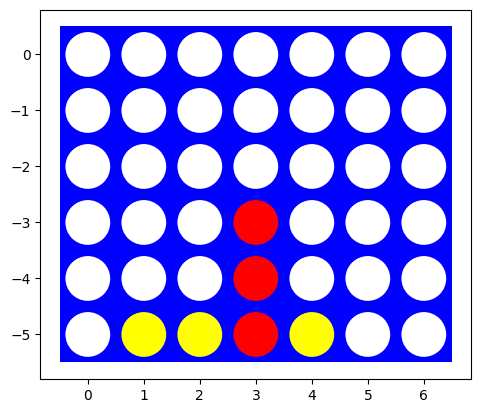

In [5]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(state)`.
* The transition model `result(state, player, action)`.
* Check for terminal states `terminal(state)`.
* The utility function `utility(state, player)`.

The player argument is used so your agent can play red or yellow.
Make sure that all these functions work with boards of different sizes (number of columns and rows).
You can follow the [tic-tac-toe example from class.](https://colab.research.google.com/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_definitions.ipynb)

In [1]:
# Your code/ answer goes here.
def actions(state):
    actions = []
    for c in range(state.shape[1]):
        if 0 in state[:,c]:
            actions.append(c)
    return actions
def result(state, player, action):
    new_state = state.copy()
    for r in range(new_state.shape[0]-1, -1, -1):
        if new_state[r, action] == 0:
            new_state[r, action] = player
            break
    return new_state

def check_winner(state, player):
  # Kiểm tra xem người chơi có 4 quân liên tiếp không
  rows,cols = state.shape

  # Kiểm tra hàng ngang
  for r in range(rows):
    for c in range(cols-3):
      if np.all(state[r,c:c+4] == player):
        return True
  # Kiểm tra hàng dọc
  for c in range(cols):
    for r in range(rows-3):
      if np.all(state[r:r+4,c] == player):
        return True
  # Kiểm tra đường chéo xuống "\"
  for r in range(rows-3):
    for c in range(cols-3):
      if np.all([state[r+i,c+i] == player for i in range(4)]):
        return True
  # Kiểm tra đường chéo lên "/"
  for r in range(3, rows):
    for c in range(cols-3):
      if np.all([state[r-i,c+i] == player for i in range(4)]) :
        return True
  return False

def terminal(state):
  if check_winner(state, 1) or check_winner(state, -1):
    return True
  if np.all(state != 0):
    return True
  return False
def utility(state):
  if check_winner(state, 1):
    return 1                      # Player 1 thắng
  elif check_winner(state, -1):
    return -1                     # Player 2 thắng
  else:
    return 0

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [2]:
# Your code/ answer goes here.
def random_player(board, player = 1):
  possible_move = actions(board)
  if not possible_move:
        return None
  return np.random.choice(possible_move)

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [6]:
# Your code/ answer goes here.
def play_game(player1, player2, N=1000, shape=(6,7), show_board=False):
  results = {"player_1": 0, "player_2": 0, "draw": 0}
  for i in range(N):
    board = empty_board(shape)
    while True:
      # Player 1 move
      p1_move = player1(board, 1)
      if p1_move is None:
        break
      board = result(board, 1, p1_move)
      if show_board:
        visualize(board)
      # Kiểm tra đã có người thắng chưa
      if terminal(board):
        u = utility(board)
        if u == 1:
          results["player_1"] += 1
        elif u == -1:
          results["player_2"] += 1
        else:
          results["draw"] += 1
        break
      # Player 2 move
      p2_move = player2(board,-1)
      if p2_move is None:
        break
      board = result(board, -1, p2_move)
      if show_board:
        visualize(board)
      # Kiểm tra đã có người thắng chưa
      if terminal(board):
        u = utility(board)
        if u == 1:
          results["player_1"] += 1
        elif u == -1:
          results["player_2"] += 1
        else:
          results["draw"] += 1
        break
  return results

stats = play_game(random_player, random_player, N=1000, show_board=False)
print(stats)

{'player_1': 563, 'player_2': 432, 'draw': 5}


## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.

__Important Notes:__
* You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The game tree for a $6 \times 7$ board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a $4 \times 4$ board first.

In [13]:
# Your code/ answer goes here.
import math
import time
def minimax_agent(board,player):
  best_value = -math.inf
  best_move = None
  for action in actions(board):
    value = min_value(result(board,player,action),-player,-math.inf,math.inf)
    if value > best_value:
      best_value = value
      best_move = action
  return best_move
def max_value(board,player,alpha,beta):
  if terminal(board):
    return utility(board)
  v = -math.inf
  for action in actions(board):
    v = max(v,min_value(result(board,player,action),-player,alpha,beta))
    if v >= beta:
      return v
    alpha = max(alpha,v)
  return v

def min_value(board,player,alpha,beta):
  if terminal(board):
    return utility(board)
  v = math.inf
  for action in actions(board):
    v = min(v,max_value(result(board,player,action),-player,alpha,beta))
    if v <= alpha:
      return v
    beta = min(beta,v)
  return v

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [ ]:
# Your code/ answer goes here.
board1 = [[0,0,0,0],
          [0,0,1,-1],
          [0,1,-1,1],
          [1,-1,1,-1]]
board2 = [[0,0,0,0],
          [1,0,-1,-1],
          [1,0,-1,1],
          [1,-1,-1,1]]
board3 = [[0,0,0,0],
          [0,0,-1,0],
          [-1,-1,0,0],
          [1,1,1,0]]
board4 = [[0,0,0,0],
          [1,0,0,0],
          [1,0,-1,0],
          [1,-1,-1,0]]
board5 = [[0,0,0,0],
          [-1,1,0,0],
          [-1,1,1,0],
          [1,-1,-1,1]]
for i, board in enumerate([board1, board2, board3, board4, board5], start=1):
    print(f"Board {i}:")
    move = minimax_agent(np.array(board), 1)  # MAX = 1
    print("Best move:", move)
    print()


Board 1:
Best move: 3

Board 2:
Best move: 0

Board 3:
Best move: 3

Board 4:
Best move: 0

Board 5:
Best move: 0



How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows. Explain why using this algorithm on a standard $6 \times 7$ board is not feasible.

In [ ]:
# Your code/ answer goes here.
"""
Với bàn cờ 4×4, thuật toán Minimax chạy khá nhanh vì số lượng nước đi có thể ít.
Tuy nhiên, khi mở rộng lên bàn cờ 6×7, số trạng thái có thể tăng theo cấp số mũ (khoảng 7⁴² ≈ 3 × 10³⁵), khiến việc duyệt hết toàn bộ cây trò chơi trở nên rất chậm và không khả thi.
Do đó, trong thực tế cần giới hạn độ sâu và dùng tỉa nhánh Alpha–Beta để giảm thời gian tính toán.
"""

'\nVới bàn cờ 4×4, thuật toán Minimax chạy khá nhanh vì số lượng nước đi có thể ít.\nTuy nhiên, khi mở rộng lên bàn cờ 6×7, số trạng thái có thể tăng theo cấp số mũ (khoảng 7⁴² ≈ 3 × 10³⁵), khiến việc duyệt hết toàn bộ cây trò chơi trở nên rất chậm và không khả thi.\nDo đó, trong thực tế cần giới hạn độ sâu và dùng tỉa nhánh Alpha–Beta để giảm thời gian tính toán.\n'

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [14]:
# Your code/ answer goes here.
"""
  Hàm ordered_actions() giúp Minimax Alpha–Beta xét nước đi “tốt” (gần trung tâm) trước, nhờ đó tỉa nhánh sớm hơn,
  giảm đáng kể thời gian tính toán mà không làm sai kết quả.
"""
import pandas as pd
def ordering_actions(board):
  num_cols = board.shape[1]
  valid_columns = []
  for c in range(num_cols):
    column = board[:, c]               # Lấy toàn bộ cột thứ c
    if 0 in column:                    # Nếu cột còn chỗ trống
      valid_columns.append(c)          # Thêm vào danh sách hợp lệ
  center_column = num_cols // 2
  distances = []
  for c in valid_columns:
    distance = abs(c - center_column)  # Khoảng cách tới trung tâm
    distances.append((c, distance))    # Lưu cả chỉ số và độ xa
  distances.sort(key=lambda x: x[1])
  ordered_columns = [c for c, _ in distances]
  return ordered_columns

# Viết lại hàm minimax để sử dụng move ordering
def minimax_agent2(board,player):
  best_value = -math.inf
  best_move = None
  for action in ordering_actions(board):
    value = min_value2(result(board,player,action),-player,-math.inf,math.inf)
    if value > best_value:
      best_value = value
      best_move = action
  return best_move
def max_value2(board,player,alpha,beta):
  if terminal(board):
    return utility(board)
  v = -math.inf
  for action in ordering_actions(board):
    v = max(v,min_value2(result(board,player,action),-player,alpha,beta))
    if v >= beta:
      return v
    alpha = max(alpha,v)
  return v

def min_value2(board,player,alpha,beta):
  if terminal(board):
    return utility(board)
  v = math.inf
  for action in ordering_actions(board):
    v = min(v,max_value2(result(board,player,action),-player,alpha,beta))
    if v <= alpha:
      return v
    beta = min(beta,v)
  return v
times = []
for i in range(3,5,1):

  # Không sử dụng odering_move
  start_time1 = time.time()
  play_game(random_player,minimax_agent, 1, (i,i), False)
  end_time1 = time.time()

  # Sử dụng ordering_move
  start_time2 = time.time()
  play_game(random_player,minimax_agent2, 1, (i,i), False)
  end_time2 = time.time()

  times.append(end_time1-start_time1)
  times.append(end_time2-start_time2)

data = {
    "Size Board": ["3x3", "3x3","4x4", "4x4"],
    "Move Ordering": ["Không", "Có", "Không", "Có"],
    "Time(s)": times
}
df = pd.DataFrame(data)
df

,Size Board,Move Ordering,Time(s)
0,3x3,Không,0.008135
1,3x3,Có,0.009539
2,4x4,Không,30.705261
3,4x4,Có,19.027872


### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [ ]:
# Your code/ answer goes here.
"""
  Khi bắt đầu với bàn cờ trống, Minimax phải xét toàn bộ cây trò chơi, đây là trường hợp tệ nhất vì không có trạng thái nào bị cắt tỉa.
  Để giảm thời gian, ta có thể:
    Giới hạn độ sâu tìm kiếm (depth limit).
    Sử dụng hàm heuristic để đánh giá sớm các trạng thái chưa kết thúc.
    Sắp xếp thứ tự nước đi (move ordering) để tăng hiệu quả alpha–beta pruning.
"""

'\n  Khi bắt đầu với bàn cờ trống, Minimax phải xét toàn bộ cây trò chơi, đây là trường hợp tệ nhất vì không có trạng thái nào bị cắt tỉa.\n  Để giảm thời gian, ta có thể:\n    Giới hạn độ sâu tìm kiếm (depth limit).\n    Sử dụng hàm heuristic để đánh giá sớm các trạng thái chưa kết thúc.\n    Sắp xếp thứ tự nước đi (move ordering) để tăng hiệu quả alpha–beta pruning.\n'

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a $4 \times 4$ board. Analyze wins, losses and draws.

In [ ]:
# Your code/ answer goes here.
play_game(minimax_agent2,random_player, 10,(4,4),False)

{'player_1': 8, 'player_2': 0, 'draw': 2}

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

In [16]:
# Your code/ answer goes here.
"""
  Hàm heuristic(state, player) để ước lượng "độ tốt" của trạng thái hiện tại cho player.
  Hàm này trả giá trị trong khoảng [-1, 1]:
    +1: trạng thái rất tốt cho player (gần thắng)
    -1: trạng thái rất tệ cho player (gần thua)
    0: trạng thái trung lập
"""
def count_pattern(board, player, length):
    count = 0
    directions = [(0, 1), (1, 0), (1, 1), (-1, 1)]
    rows, cols = board.shape

    for r in range(rows):
        for c in range(cols):
            for dr, dc in directions:
                line = []
                for i in range(length):
                    nr, nc = r + dr*i, c + dc*i
                    if 0 <= nr < rows and 0 <= nc < cols:
                        line.append(board[nr][nc])
                    else:
                        break
                if len(line) == length and line == [player] * length:
                    count += 1
    return count

def heuristic_evaluation(board, player):
    score = 0
    score += count_pattern(board, player, 3) * 80
    score += count_pattern(board, player, 2) * 20
    score -= count_pattern(board, -player, 3) * 100
    score -= count_pattern(board, -player, 2) * 30
    return np.tanh(score / 200)


### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [21]:
# Your code/ answer goes here.
# Viết lại hàm minimax để sử dụng kỹ thuật cut off
def minimax_agent3(board,player,max_depth = 3):
  best_value = -math.inf
  best_move = None

  for action in ordering_actions(board):
    value = min_value3(result(board,player,action),-player,max_depth-1,-math.inf,math.inf)
    if value > best_value:
      best_value = value
      best_move = action
  return best_move

def max_value3(board,player,depth,alpha,beta):
  if terminal(board):
    return utility(board)
  elif depth == 0:
    return heuristic_evaluation(board, player)
  v = -math.inf
  for action in ordering_actions(board):
    v = max(v,min_value3(result(board,player,action),-player,depth-1,alpha,beta))
    if v >= beta:
      return v
    alpha = max(alpha,v)
  return v

def min_value3(board,player,depth,alpha,beta):
  if terminal(board):
    return utility(board)
  elif depth == 0:
    return heuristic_evaluation(board, -player)
  v = math.inf
  for action in ordering_actions(board):
    v = min(v,max_value3(result(board,player,action),-player,depth-1,alpha,beta))
    if v <= alpha:
      return v
    beta = min(beta,v)
  return v

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

Agent chọn cột: 3


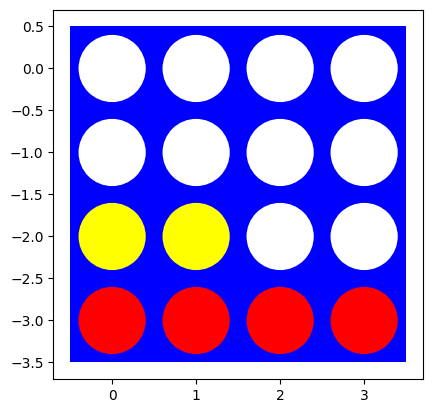

In [15]:
# Your code/ answer goes here.
board6 = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [-1,-1, 0, 0],  # Player 1 chỉ cần đặt thêm 1 quân ở cột 3 để thắng
    [1, 1, 1, 0]
])


move = minimax_agent3(board6, player=1, max_depth=3)

print("Agent chọn cột:", move)
visualize(result(board6,1,move))

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [24]:
# Your code/ answer goes here.
import time

for cols in [4, 5, 6]:
    board = empty_board((cols,cols))
    start = time.time()
    move = minimax_agent3(board, player=1, max_depth=3)
    end = time.time()
    print(f"{cols} cột -> Thời gian: {end - start:.3f}s, Nước đi: {move}")


4 cột -> Thời gian: 0.023s, Nước đi: 2
5 cột -> Thời gian: 0.071s, Nước đi: 2
6 cột -> Thời gian: 0.147s, Nước đi: 3


### Playtime [5 points]

Let two heuristic search agents (different cutoff depth) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [23]:
# Your code/ answer goes here
play_game(minimax_agent3,minimax_agent, 10,(4,4),False)

{'player_1': 10, 'player_2': 0, 'draw': 0}

## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [ ]:
# Your code/ answer goes here.


### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.  

In [ ]:
# Your code/ answer goes here.